# Data preparation

### Before starting with the proper analysis of the data, we will first take a quick look at the it, see what kind of information we got, clean it or transform it into more useful types of data, create additional variables that can be computed using the raw data, etc.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Define if IRCRA or base0
IRCRA = True

First of all we read the data and do a quick display simply to scan what kind of information we have, how many rows and columns, there are, and quick look at the datatypes involved. 

In [2]:
rawData = pd.read_csv("rawData.csv")
rawData.head(5)

,Marca temporal,What is your gender?,"What is your age? (In years. Ej, 27)","What is your height? (in centimeters. Ej, 166)","What is your ape index? (Full armspan minus height). *If you don't know it, put 0",How much do you weight? (In kg),Do you study or work?,What continent do you live in?,In which country do you live or climb at the most?,How often do you visit gyms/crags on states or countries other than the one you live in?,...,What is the first thing you do when you get to the cym/crag?.1,How many routes do you normally climb in a day? (#),What is your hardest onsight/flash grade?,What is your hardest redpoint/projected grade?,"What grade do you feel a 80+% confidence to say ""I can most likely onsight/flash that""?","What grade do you feel a 80+% confidence to say ""I can most likely finish that, even if i fall (no send)""","On your first attempt on a new project/route/problem at or above your current max grade, you normally...","When projecting SPORTS, how many attempts would you have on your projected route on the same day?",Which do you feel is usually your best performance on a project or hard route?,"When projecting, do you purposely try to visit the same crag in order to focus on your route, or do you simply work it when you happen to go back there?"
0,5/2/2020 19:52,Female,27,163.0,0,52.0,Work fulltime,Asia,Hong Kong,Around thrice a year,...,"Climb an easy route, meant as a warmup",8,5.10b / 6a+,5.10d / 6b+,5.9 / 6a,5.10b / 6a+,Top-rope it first (sports),Usually 1 one attempt per day,1st attempt of the day,I purposely go to the same crag to keep going ...
1,5/2/2020 20:10,Male,30,178.0,-1,67.0,Work fulltime,Asia,Hong Kong,Around every 2 months,...,"Climb an easy route, meant as a warmup",5,5.11b / 6c,5.11d / 7a,5.10b / 6a+,5.11d / 7a,Try to go for the onsight/flash (sports and bo...,Usually more than 3 attempts per day,3rd attempt of the day,I purposely go to the same crag to keep going ...
2,5/2/2020 20:36,Male,28,180.0,0,67.0,Work fulltime,Asia,Hong Kong,Around once a year,...,Stretch and warmup (before climbing),4,5.10d / 6b+,5.11b / 6c,5.9 / 6a,5.10b / 6a+,Try to go for the onsight/flash (sports and bo...,Usually 3 attempts per day,2nd attempt of the day,I would simply work on it whenever I happen to...
3,5/2/2020 20:40,Female,27,162.0,0,57.0,Work fulltime,Asia,Hong Kong,Around twice a year,...,Stretch and warmup (before climbing),0,5.8 / Fr(5) or lower,5.8 / Fr(5) or lower,5.8 / Fr(5) or lower,5.8 / Fr(5) or lower,Try the holds and moves individually first (bo...,Usually 1 one attempt per day,2nd attempt of the day,I purposely go to the same crag to keep going ...
4,5/2/2020 21:08,Male,30,173.0,-4,68.0,Work fulltime,Asia,Hong Kong,Around every 2 months,...,"Climb an easy route, meant as a warmup",2,5.9 / 6a,5.11b / 6c,5.9 / 6a,5.11b / 6c,Top-rope it first (sports),Usually 3 attempts per day,3rd attempt of the day,I purposely go to the same crag to keep going ...


Then we take a closer look at each individual question/column and its corresponding index, which we will use to address it since the column names are rather long.

In [3]:
for i,c in enumerate(rawData.columns):
    print(i,c)

0 Marca temporal
1 What is your gender?
2 What is your age? (In years. Ej, 27)
3 What is your height? (in centimeters. Ej, 166)
4 What is your ape index? (Full armspan minus height). *If you don't know it, put 0
5 How much do you weight? (In kg)
6 Do you study or work?
7 What continent do you live in?
8 In which country do you live or climb at the most?
9 How often do you visit gyms/crags on states or countries other than the one you live in?
10 If you plan a vacation, it is most likely intended as a...
11 Which describes you the best?
12 Which describes you the best?.1
13 How many years have you been climbing?
14 Is/was any of your parents a climber?
15 Why do you climb? 
16 On average how many days do you climb in a week?
17 How many of those are indoors?
18 How many of those do you consider "training" sessions?
19 In case you train, how do you train?
20 How long are your training sessions on average?
21 In case you train at a gym, what facilities does it include?
22 In case you clim

Lastly, before starting the actual pre-processing of the data, just a quick descriptive glimpse of the general distributions that we might care about.

In [4]:
rawData.describe()

,"What is your age? (In years. Ej, 27)","What is your height? (in centimeters. Ej, 166)","What is your ape index? (Full armspan minus height). *If you don't know it, put 0",How much do you weight? (In kg),How many years have you been climbing?,On average how many days do you climb in a week?,How many of those are indoors?,"How many of those do you consider ""training"" sessions?",How many routes do you normally climb in a day? (#)
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.00000,156.000000,156.000000,156.000000
mean,27.608974,171.653077,0.692308,63.581410,5.335256,2.75641,2.006410,1.282051,6.089744
std,8.251353,9.749309,2.965643,10.273095,5.479002,1.18796,1.210155,1.211743,4.414597
min,15.000000,150.000000,-10.000000,40.000000,0.500000,0.00000,0.000000,0.000000,0.000000
25%,22.000000,164.000000,0.000000,56.000000,2.000000,2.00000,1.000000,0.000000,4.000000
50%,25.000000,170.000000,0.000000,63.000000,3.750000,3.00000,2.000000,1.000000,5.000000
75%,30.250000,179.000000,0.000000,70.000000,6.000000,3.00000,3.000000,2.000000,7.000000
max,58.000000,208.000000,13.000000,108.000000,31.000000,6.00000,7.000000,7.000000,30.000000


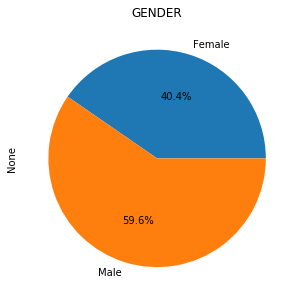

In [5]:
plot = rawData.groupby(rawData.columns[1]).count().max(axis=1).plot.pie(title="GENDER",autopct='%1.1f%%',figsize=(5, 5))

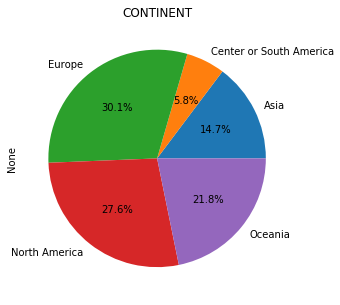

In [6]:
plot = rawData.groupby(rawData.columns[7]).count().max(axis=1).plot.pie(title="CONTINENT",autopct='%1.1f%%',figsize=(5, 5))

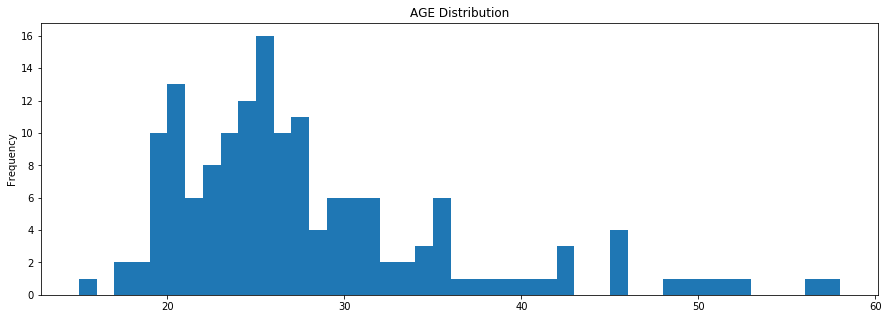

In [7]:
plot = rawData[rawData.columns[2]].plot.hist(title="AGE Distribution",
    bins=rawData[rawData.columns[2]].max()-rawData[rawData.columns[2]].min(),figsize=(15, 5))

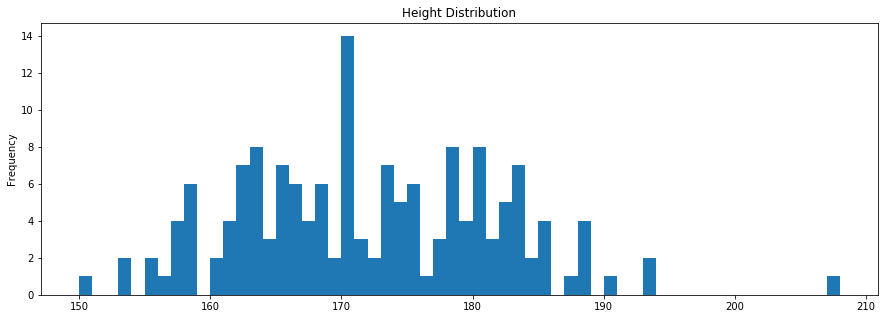

In [8]:
plot = rawData[rawData.columns[3]].plot.hist(title="Height Distribution",
    bins=int(rawData[rawData.columns[3]].max()-rawData[rawData.columns[3]].min()),figsize=(15, 5))

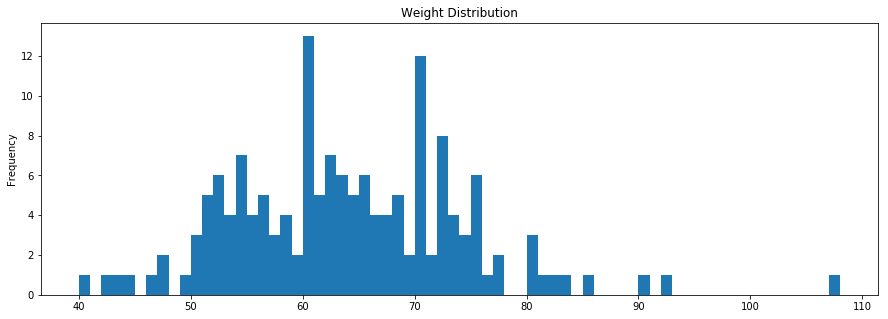

In [9]:
plot = rawData[rawData.columns[5]].plot.hist(title="Weight Distribution",
    bins=int(rawData[rawData.columns[5]].max()-rawData[rawData.columns[5]].min()),figsize=(15, 5))

From these initial summaries and graphs we can see that there were 156 respondants of the survey, consisting 60% of men and 40% of women, with a rather diverse geographical distribution including people from every continent but Africa, and aging 15 and 60 years old. 

While it is not a big or diverse enough database to be statistically significant, it still allows for some playing around and experimentation to see if some interesting correlations start to show up. So now that we see that the data looks promising, we can begin with the actual preprocessing.

## Dealing with numerical and categotical data

In data science it is usually preferred to have numeric data, since there are many tools for numerical analysis, however the data might not always present itself that way. Sometimes it is possible to transform data from categoric variables to a relatively equivalent numeric variable, for example route gradings can be transformed from 10a, 10b, 10c, 10d into simply numbers like 1,2,3,4 and that allows for a better numerical analysis without compromising much. The average of 10a and 10c would be 10b, as he average of 1 and 3 would be 2. This could be called "numerical encoding".

But in other cases, transforming variables into numbres makes no sense, for example transforming Asia, Africa, Europe into 1,2,3 makes no sense since Europe is not greater than Asia, and Africa is not the average of Asia and Europe. For this kinds of data a process called "one-shot encoding" is performed, and instead of having a single "continent" variable that can have 6 different values, we have 6 different variables (Asia, Africa, Europe...) and their values are either 0 or 1, indicating if they are or aren't that continent.

With these 2 processess in mind, lets encode the data as we would prefer to have it.
Keep in mind that I created the survey, so I already have a good understanding of each variable and which encoding makes the most sense for each, but in normal scenarios you would be dealing with data you did not personally collect so you would have to play around with it a bit more before you can understand which representations work best.

We will start a new dataframe in order to start building over it, adding the columns as they are being cleaned and pre-processed. And we will also start using easier column names for future reference.

In [10]:
#Nice data 
niceData = rawData[rawData.describe().columns]
niceData.head(5)

,"What is your age? (In years. Ej, 27)","What is your height? (in centimeters. Ej, 166)","What is your ape index? (Full armspan minus height). *If you don't know it, put 0",How much do you weight? (In kg),How many years have you been climbing?,On average how many days do you climb in a week?,How many of those are indoors?,"How many of those do you consider ""training"" sessions?",How many routes do you normally climb in a day? (#)
0,27,163.0,0,52.0,3.0,3,2,0,8
1,30,178.0,-1,67.0,8.0,4,2,1,5
2,28,180.0,0,67.0,5.0,2,1,1,4
3,27,162.0,0,57.0,1.0,2,1,1,0
4,30,173.0,-4,68.0,1.5,3,2,2,2


In [11]:
niceData.columns = ["AGE","HEIGHT","APEINDEX","WEIGHT","YRS_CLIMBING","CLIMBDAYS","INDOORDAYS","TRAINDAYS","ROUTEQTY"]
niceData.head(5)

,AGE,HEIGHT,APEINDEX,WEIGHT,YRS_CLIMBING,CLIMBDAYS,INDOORDAYS,TRAINDAYS,ROUTEQTY
0,27,163.0,0,52.0,3.0,3,2,0,8
1,30,178.0,-1,67.0,8.0,4,2,1,5
2,28,180.0,0,67.0,5.0,2,1,1,4
3,27,162.0,0,57.0,1.0,2,1,1,0
4,30,173.0,-4,68.0,1.5,3,2,2,2


### Numerical encoding variables

Mapping the corresponding numeric value of each possible answer, using python dictionaries.

In [12]:
#Vacations
vacations = {"Completely non-climbing trip":0,"Trip that might have some climbing":1,
             "Mainly climbing trip but something else as well":2,"Completely a climbing trip":3}
travel = {"Never":0, "Around once a year":1, "Around twice a year":2, "Around thrice a year":3,
               "Around every 2 months":6, "Around once per month":12, "More than once per month":20}
#Training
trainLength = {"I do not train":0, "Less than an hour":.5, "1 to 2 hours":1.5,
              "2 to 3 hours":2.5, "More than 3 hours":4}
shoeFit = {"\"Comfy fit\"":0, "Normal fit":1, "Tight fit":2, "Very tight, borderline painful, fit":3}

#Projecting
attempts = {"Usually 1 one attempt per day":1, "Usually 2 attempts per day":2, "Usually 3 attempts per day":3,
           "Usually more than 3 attempts per day":5}
success = {"1st attempt of the day":1, "2nd attempt of the day":2, "3rd attempt of the day":3,
          "Random attempt":2.5, "Last attempt of the day":4}
projecting = {"I do not project":0, "I would simply work on it whenever I happen to be there again":1, 
             "I purposely go to the same crag to keep going at it":2}

#Grades
boulders = {"V0":0, "V1":1, "V2":2, "V3":3, "V4":4, "V5":5, "V6":6, "V7":7, "V8":8, "V9":9,
         "V10":10, "V11":11, "V12":12, "V13":13, "V14":14, "V15":15, "V16":16}
routes = {"5.8 / Fr(5) or lower":0, "5.9 / 6a":1, 
          "5.10a / 6a+":2, "5.10b / 6a+":3, "5.10c / 6b":4, "5.10d / 6b+":5,
          "5.11a / 6b+":6, "5.11b / 6c":7, "5.11c / 6c+":8, "5.11d / 7a":9,
          "5.12a / 7a+":10, "5.12b / 7b":11, "5.12c / 7b+":12, "5.12d / 7c":13,
          "5.13a / 7c+":14, "5.13b / 8a":15, "5.13c / 8a+":16, "5.13d /8b":17,
          "5.14a / 8b+":18, "5.14b / 8c":19, "5.14c / 8c+":20, "5.14d / 9a":21,
          "5.15a / 9a+":22, "5.15b / 9b":23, "5.15c / 9b+":24, "5.15d / 9c":25}

#IRCRA Grades
bouldersIRCRA = {"V0":12, "V1":14, "V2":15, "V3":17, "V4":18, "V5":19, "V6":20, "V7":21, "V8":22, "V9":24,
         "V10":25, "V11":26, "V12":27, "V13":29, "V14":30, "V15":31, "V16":32}
routesIRCRA = {"5.8 / Fr(5) or lower":8, "5.9 / 6a":9, 
          "5.10a / 6a+":10, "5.10b / 6a+":11, "5.10c / 6b":12, "5.10d / 6b+":13,
          "5.11a / 6b+":14, "5.11b / 6c":15, "5.11c / 6c+":16, "5.11d / 7a":17,
          "5.12a / 7a+":18, "5.12b / 7b":19, "5.12c / 7b+":20, "5.12d / 7c":21,
          "5.13a / 7c+":22, "5.13b / 8a":23, "5.13c / 8a+":24, "5.13d /8b":25,
          "5.14a / 8b+":26, "5.14b / 8c":27, "5.14c / 8c+":28, "5.14d / 9a":29,
          "5.15a / 9a+":30, "5.15b / 9b":31, "5.15c / 9b+":32, "5.15d / 9c":33}

Actual encoding of the defined mapping into our database. We use the column number id (from almost the beggining of the document) in order to address each column.

In [13]:
niceData.loc[:,"VACATIONS"]=0
niceData.loc[:,"TRAVEL"]=0
niceData.loc[:,"TRAINLENGTH"]=0
niceData.loc[:,"SHOEFIT"]=0
niceData.loc[:,"ATTEMPTS"]=0
niceData.loc[:,"BESTGO"]=0
niceData.loc[:,"PROJECTING"]=0

for k, v in vacations.items():
    niceData.loc[rawData.loc[:,rawData.columns[10]] == k,"VACATIONS"] = v
for k, v in travel.items():
    niceData.loc[rawData.loc[:,rawData.columns[9]] == k,"TRAVEL"] = v
for k, v in trainLength.items():
    niceData.loc[rawData.loc[:,rawData.columns[20]] == k,"TRAINLENGTH"] = v
for k, v in shoeFit.items():
    niceData.loc[rawData.loc[:,rawData.columns[24]] == k,"SHOEFIT"] = v
for k, v in attempts.items():
    niceData.loc[rawData.loc[:,rawData.columns[41]] == k,"ATTEMPTS"] = v
for k, v in success.items():
    niceData.loc[rawData.loc[:,rawData.columns[42]] == k,"BESTGO"] = v
for k, v in projecting.items():
    niceData.loc[rawData.loc[:,rawData.columns[43]] == k,"PROJECTING"] = v

#Grades / Goals
boulderGoals = rawData.iloc[:,28:34]
boulderGoals.columns = ["B_INFLASH","B_INREDP","B_OUTFLASH","B_OUTREDP","B_FLASHCONF","B_SENDCOF"]

routeGoals = rawData.iloc[:,36:40]
routeGoals.columns = ["S_FLASH","S_REDP","S_FLASHCONF","S_FINISHCONF"]

#Grades / Goals
if IRCRA:
    boulderGoals = boulderGoals.replace(bouldersIRCRA)
    routeGoals = routeGoals.replace(routesIRCRA)
else:
    boulderGoals = boulderGoals.replace(boulders)
    routeGoals = routeGoals.replace(routes)
    

c:\users\alexc\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\alexc\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### One-shot encoding

In [14]:
#Climber type
inout = {"Indoor climber":"INDOOR","Outdoor climber":"OUTDOOR","Both rather equally":"INOUTDOOR"}
boulsport = {"Sports climber":"SPORT","Boulderer":"BOULDER","Both rather equally":"BOUL_SPORT"}

#Why climb
whyOptions = {"Fun of the activity in itself":"WHY_FUN","Health":"WHY_HEALTH","For the social part of climbing":"WHY_SOCIAL",
             "Competition":"WHY_COMP","The places it takes you":"WHY_PLACES","For the challenge":"WHY_CHALLENGE"}

#WOrk location and travel
workOptions = {"Study":"OCC_STUDY","Work parttime":"OCC_PART","Work fulltime":"OCC_FULL","Study and work":"OCC_BOTH","Neither":"OCC_NEITHER"}
continentOptions = {"North America":"C_NA","Center or South America":"C_CSA","Europe":"C_EU","Asia":"C_AS","Africa":"C_AF","Oceania":"C_OCE"}

#Training
trainType = {"I do not train":"TRAIN_NA","Follow a training program with a coach":"TRAIN_COACH",
            "Follow a training program from a book or online course":"TRAIN_BOOK",
            "Follow a training program by myself":"TRAIN_SELF",
            "I perform random exercises as they feel appropiate":"TRAIN_RANDOM",
            "I just climb more":"TRAIN_CLIMB"}
facilities = {"Bouldering area":"FAC_BOULDER","Lead climbing area":"FAC_LEAD","without autobelay":"FAC_TOP",
             "with autobelay":"FAC_AUTO","Hang board, campus board, finger board or similar":"FAC_BOARDS",
             "Moonboard or similar":"FAC_MOON","Gym / weightlifting facilities":"FAC_GYM"}
indoorReason = {"I do not indoor climb":"IN_NA","I indoor climb to improve my outdoor climbing":"IN_OUT",
                "I indoor climb because i like indoor climbing":"IN_IN"}
trainingAspects = {"Finger strength":"FOCUS_FINGER","Footwork":"FOCUS_FOOT","Core strength":"FOCUS_CORE","Endurance":"FOCUS_END",
                   "Power endurance":"FOCUS_POW","Route/problem-specific sequences":"FOCUS_SEQ",
                   "Trying more/different routes/problems":"FOCUS_DIFF","Cardio":"FOCUS_CARDIO",
                   "Flexibility":"FOCUS_FLEX","Explosive power":"FOCUS_EXPLO"}

#Diet
diet = {"No, I eat anything":"DIET_NO","fish":"DIET_FISH",
       "Vegetarian":"DIET_VEGETARIAN","Vegan":"DIET_VEGAN","Other":"DIET_OTHER"}

#Preclimb
preclimbB = {"before climbing":"PREB_WARM","Climb easy problems, meant as a warmup":"PREB_EASY",
            "Jump straight into the hard stuff":"PREB_HARD"}
preclimbS = {"before climbing":"PRES_WARM","Climb an easy route, meant as a warmup":"PRES_EASY",
            "Jump straight into the hard stuff":"PRES_HARD"}

#Projecting
projectStrat = {"Try to go for the onsight/flash":"PROJ_ONSIGHT",
                "Try the holds and moves individually first":"PROJ_HOLDS",
                "Climb it while resting on every other bolt to explore the moves":"PROJ_REST",
                "Top-rope it first":"PROJ_TOP"}

In [15]:
#OneShot mappings and numeric conversions
#Is female
niceData.loc[:,"FEMALE"]=0
niceData.loc[rawData.loc[:,rawData.columns[1]]=="Male","FEMALE"] = 0
niceData.loc[rawData.loc[:,rawData.columns[1]]=="Female","FEMALE"] = 1

#Has climbing parents
niceData.loc[:,"PARENTS"]=0
niceData.loc[rawData.loc[:,rawData.columns[14]]=="No","PARENTS"] = 0
niceData.loc[rawData.loc[:,rawData.columns[14]]=="Yes","PARENTS"] = 1

#Practices other sport
niceData.loc[:,"OTHERSPORT"]=0
niceData.loc[rawData.loc[:,rawData.columns[26]]=="No","OTHERSPORT"] = 0
niceData.loc[rawData.loc[:,rawData.columns[26]]=="Yes","OTHERSPORT"] = 1

#Changing column names to simpler names (as per the mapping) and then do the encoding
for k, v in inout.items():
    niceData.loc[:,v]=0
    niceData.loc[rawData.loc[:,rawData.columns[11]].str.contains(k),v] = 1
for k, v in boulsport.items():
    niceData.loc[:,v]=0
    niceData.loc[rawData.loc[:,rawData.columns[12]].str.contains(k),v] = 1
for k, v in whyOptions.items():
    niceData.loc[:,v]=0
    niceData.loc[rawData.loc[:,rawData.columns[15]].str.contains(k),v] = 1
for k, v in workOptions.items():
    niceData.loc[:,v]=0
    niceData.loc[rawData.loc[:,rawData.columns[6]].str.contains(k),v] = 1
for k, v in continentOptions.items():
    niceData.loc[:,v]=0
    niceData.loc[rawData.loc[:,rawData.columns[7]].str.contains(k),v] = 1
for k, v in trainType.items():
    niceData.loc[:,v]=0
    niceData.loc[rawData.loc[:,rawData.columns[19]].str.contains(k),v] = 1
for k, v in facilities.items():
    niceData.loc[:,v]=0
    #This specific question had null values because it was not a mandatory question on the survey, 
    #so here lets replace non-answer as not selecting that option
    niceData.loc[rawData.loc[:,rawData.columns[21]].str.contains(k).replace(np.nan,False),v] = 1
for k, v in indoorReason.items():
    niceData.loc[:,v]=0
    niceData.loc[rawData.loc[:,rawData.columns[22]].str.contains(k),v] = 1
for k, v in trainingAspects.items():
    niceData.loc[:,v]=0
    niceData.loc[rawData.loc[:,rawData.columns[23]].str.contains(k),v] = 1
for k, v in diet.items():
    niceData.loc[:,v]=0
    niceData.loc[rawData.loc[:,rawData.columns[25]].str.contains(k),v] = 1
for k, v in preclimbB.items():
    niceData.loc[:,v]=0
    niceData.loc[rawData.loc[:,rawData.columns[27]].str.contains(k),v] = 1
for k, v in preclimbS.items():
    niceData.loc[:,v]=0
    niceData.loc[rawData.loc[:,rawData.columns[34]].str.contains(k),v] = 1
for k, v in projectStrat.items():
    niceData.loc[:,v]=0
    niceData.loc[rawData.loc[:,rawData.columns[40]].str.contains(k),v] = 1

### Meta-variables

After simply cleaning the existing variables, now we can creater new variables that we think could be useful...

In [16]:
#Starting Age: simply having the age where the person started climbing
niceData["START_AGE"]=niceData["AGE"]-niceData["YRS_CLIMBING"]

#BMI: body mass index
niceData["BMI"]=niceData["WEIGHT"]/((niceData["HEIGHT"]/100)**2)

#Training: how much of their climbing time is spent training
#and how many total hours they train per week
niceData["TRAINPCT"]=(niceData["TRAINDAYS"]/niceData["INDOORDAYS"]).fillna(0)
niceData["TOTALTRAIN"]=niceData["TRAINDAYS"]*niceData["TRAINLENGTH"]

#Creating new grades of interest
#Average boulder grade, considering flashes, redpoints and "confidence" level
boulderGoals["B_AVG"] = boulderGoals.mean(axis=1)
#Flas potential for indoors and outdoors defined as the difference between redpoint and flash
#Flash is also redpoint, so flash could not be greater than redpoint, so we limit it at minimum 0
boulderGoals["B_INPOTENTIAL"] = boulderGoals["B_INREDP"] - boulderGoals["B_INFLASH"]
boulderGoals.loc[boulderGoals["B_INPOTENTIAL"]<0,"B_INPOTENTIAL"]=0
boulderGoals["B_OUTPOTENTIAL"] = boulderGoals["B_OUTREDP"] - boulderGoals["B_OUTFLASH"]
boulderGoals.loc[boulderGoals["B_OUTPOTENTIAL"]<0,"B_OUTPOTENTIAL"]=0

#Average sports grade
routeGoals["S_AVG"] = routeGoals.mean(axis=1)
#Flash potential as the difference between flash and redpoint grades
#Flash is also redpoint, so flash could not be greater than redpoint, so we limit it at minimum 0
routeGoals["S_FPOTENTIAL"] = routeGoals["S_REDP"] - routeGoals["S_FLASH"]
routeGoals.loc[routeGoals["S_FPOTENTIAL"]<0,"S_FPOTENTIAL"]=0
#Inconsistency defined as the difference between max flash and "confident" flash
#Your max flash should be over your near guaranteed flash, so we limit it at minimum 0
routeGoals["S_INCONSISTENCY"] = routeGoals["S_FLASH"] - routeGoals["S_FLASHCONF"]
routeGoals.loc[routeGoals["S_INCONSISTENCY"]<0,"S_INCONSISTENCY"]=0
#Max potential defined as the difference between "finish" and redpoint grades
#Here we wont limit at 0 because you can be more or less confident about finishing a route
#A MPOTENTIAL below 0 could mean that you probably already climb harder and you lack self-belief on sending
#A MPOTENTIAL over 0 could mean that you are very confident in your skills and lack commitment, projecting or trying
routeGoals["S_MPOTENTIAL"] = routeGoals["S_FINISHCONF"] - routeGoals["S_REDP"]

for c in boulderGoals.columns:
    niceData[c]=boulderGoals[c].astype('float64')
for c in routeGoals.columns:
    niceData[c]=routeGoals[c].astype('float64')

## Save it

Now, we look at out finished/clean table, and if we like it and believe it will now be useful for further processing we can proceed to store it to be able to start using it without having to repeat this pre-processing step before the proper data exploratory analysis or any other subsequent step.


In [17]:
niceData.head(5)

,AGE,HEIGHT,APEINDEX,WEIGHT,YRS_CLIMBING,CLIMBDAYS,INDOORDAYS,TRAINDAYS,ROUTEQTY,VACATIONS,...,B_INPOTENTIAL,B_OUTPOTENTIAL,S_FLASH,S_REDP,S_FLASHCONF,S_FINISHCONF,S_AVG,S_FPOTENTIAL,S_INCONSISTENCY,S_MPOTENTIAL
0,27,163.0,0,52.0,3.0,3,2,0,8,1,...,0.0,0.0,3.0,5.0,1.0,3.0,3.0,2.0,2.0,-2.0
1,30,178.0,-1,67.0,8.0,4,2,1,5,2,...,1.0,1.0,7.0,9.0,3.0,9.0,7.0,2.0,4.0,0.0
2,28,180.0,0,67.0,5.0,2,1,1,4,1,...,2.0,1.0,5.0,7.0,1.0,3.0,4.0,2.0,4.0,-4.0
3,27,162.0,0,57.0,1.0,2,1,1,0,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30,173.0,-4,68.0,1.5,3,2,2,2,1,...,1.0,2.0,1.0,7.0,1.0,7.0,4.0,6.0,0.0,0.0



Even though order of columns is not particularly important, I like to keep them ordered in a way that makes sense to me, so feel free to arbitrarily reorder the columns as you wish.

In [18]:
niceData = niceData.loc[:,["FEMALE","AGE","YRS_CLIMBING","START_AGE","PARENTS","HEIGHT",
            "APEINDEX","WEIGHT","BMI","OCC_STUDY","OCC_PART","OCC_FULL",
            "OCC_BOTH","OCC_NEITHER","C_NA","C_CSA","C_EU","C_AS",
            "C_AF","C_OCE","TRAVEL","VACATIONS","INDOOR","OUTDOOR",
            "INOUTDOOR","SPORT","BOULDER","BOUL_SPORT","OTHERSPORT","WHY_FUN",
            "WHY_HEALTH","WHY_SOCIAL","WHY_COMP","WHY_PLACES","WHY_CHALLENGE","CLIMBDAYS",
            "INDOORDAYS","TRAINDAYS","TRAINPCT","TOTALTRAIN","TRAINLENGTH",
            "TRAIN_NA","TRAIN_COACH","TRAIN_BOOK","TRAIN_SELF","TRAIN_RANDOM","TRAIN_CLIMB",
            "FAC_BOULDER","FAC_LEAD","FAC_TOP","FAC_AUTO","FAC_BOARDS","FAC_MOON",
            "FAC_GYM","IN_NA","IN_OUT","IN_IN","FOCUS_FINGER","FOCUS_FOOT",
            "FOCUS_CORE","FOCUS_END","FOCUS_POW","FOCUS_SEQ","FOCUS_DIFF","FOCUS_CARDIO",
            "FOCUS_FLEX","FOCUS_EXPLO","SHOEFIT","DIET_NO","DIET_FISH","DIET_VEGETARIAN",
            "DIET_VEGAN","DIET_OTHER","PREB_WARM","PREB_EASY","PREB_HARD","PRES_WARM",
            "PRES_EASY","PRES_HARD","PROJ_ONSIGHT","PROJ_HOLDS","PROJ_REST","PROJ_TOP",
            "ROUTEQTY","ATTEMPTS","BESTGO","PROJECTING","B_INFLASH","B_INREDP",
            "B_OUTFLASH","B_OUTREDP","B_FLASHCONF","B_SENDCOF","B_AVG","B_INPOTENTIAL",
            "B_OUTPOTENTIAL","S_FLASH","S_REDP","S_FLASHCONF","S_FINISHCONF","S_AVG",
            "S_FPOTENTIAL","S_MPOTENTIAL","S_INCONSISTENCY"]]

niceData.head(5)

,FEMALE,AGE,YRS_CLIMBING,START_AGE,PARENTS,HEIGHT,APEINDEX,WEIGHT,BMI,OCC_STUDY,...,B_INPOTENTIAL,B_OUTPOTENTIAL,S_FLASH,S_REDP,S_FLASHCONF,S_FINISHCONF,S_AVG,S_FPOTENTIAL,S_MPOTENTIAL,S_INCONSISTENCY
0,1,27,3.0,24.0,1,163.0,0,52.0,19.571681,0,...,0.0,0.0,3.0,5.0,1.0,3.0,3.0,2.0,-2.0,2.0
1,0,30,8.0,22.0,0,178.0,-1,67.0,21.146320,0,...,1.0,1.0,7.0,9.0,3.0,9.0,7.0,2.0,0.0,4.0
2,0,28,5.0,23.0,0,180.0,0,67.0,20.679012,0,...,2.0,1.0,5.0,7.0,1.0,3.0,4.0,2.0,-4.0,4.0
3,1,27,1.0,26.0,0,162.0,0,57.0,21.719250,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,30,1.5,28.5,0,173.0,-4,68.0,22.720438,0,...,1.0,2.0,1.0,7.0,1.0,7.0,4.0,6.0,0.0,0.0


In [19]:
niceData.describe()

,FEMALE,AGE,YRS_CLIMBING,START_AGE,PARENTS,HEIGHT,APEINDEX,WEIGHT,BMI,OCC_STUDY,...,B_INPOTENTIAL,B_OUTPOTENTIAL,S_FLASH,S_REDP,S_FLASHCONF,S_FINISHCONF,S_AVG,S_FPOTENTIAL,S_MPOTENTIAL,S_INCONSISTENCY
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.00000
mean,0.403846,27.608974,5.335256,22.273718,0.083333,171.653077,0.692308,63.581410,21.488921,0.442308,...,1.339744,1.192308,5.500000,7.891026,4.134615,6.942308,6.116987,2.448718,-0.948718,1.50000
std,0.492248,8.251353,5.479002,6.624910,0.277276,9.749309,2.965643,10.273095,2.251519,0.498260,...,0.946960,1.164615,3.764863,4.028245,3.215058,4.152326,3.608058,1.867532,2.012204,1.37019
min,0.000000,15.000000,0.500000,10.000000,0.000000,150.000000,-10.000000,40.000000,16.003658,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.00000
25%,0.000000,22.000000,2.000000,19.000000,0.000000,164.000000,0.000000,56.000000,20.010952,0.000000,...,1.000000,0.000000,2.000000,6.000000,1.000000,4.000000,3.687500,1.000000,-2.000000,0.00000
50%,0.000000,25.000000,3.750000,21.000000,0.000000,170.000000,0.000000,63.000000,21.258503,0.000000,...,1.000000,1.000000,5.000000,8.000000,4.000000,7.000000,6.000000,2.000000,-1.000000,1.00000
75%,1.000000,30.250000,6.000000,24.125000,0.000000,179.000000,0.000000,70.000000,22.796824,1.000000,...,2.000000,2.000000,8.000000,10.000000,6.000000,10.000000,8.500000,3.000000,0.000000,3.00000
max,1.000000,58.000000,31.000000,53.000000,1.000000,208.000000,13.000000,108.000000,27.777778,1.000000,...,6.000000,7.000000,21.000000,21.000000,20.000000,22.000000,21.000000,8.000000,6.000000,5.00000


In [20]:
if IRCRA:
    niceData.to_csv("niceDataIRCRA.csv",index=False)
else:
    niceData.to_csv("niceData.csv",index=False)